In [1]:
# Necessary imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

print('Libraries imported')

Libraries imported


In [2]:
path = r'C:/Metis_Bootcamp/Regression_project/data/joined-full-data//' # data path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data = pd.read_csv(filename, index_col=0, header=0)
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

print(df.shape)

df.head()

(164784, 15)


,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Entertainment,Safety,Price
0,2020 BMW 330 i xDrive,"24,371","Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$29,893"
1,2015 Audi A6 2.0T Premium Plus,"89,351","Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Brake Assist', 'Stability Control']","$16,995"
2,2018 Toyota RAV4 Limited,"11,863","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$26,225"
3,2018 Toyota RAV4 Limited,"17,501","Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,"['Bluetooth', 'Premium Sound System']","['Backup Camera', 'Brake Assist', 'Stability C...","$25,903"
4,2019 Honda CR-V EX-L,"19,241","Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,"['Bluetooth', 'Apple CarPlay/Android Auto']","['Backup Camera', 'Brake Assist', 'Stability C...","$28,145"


In [3]:
def model_year_extractor(name):
    
    name_year = name.replace('Certified ','').strip()
    
    year = int(name_year.split(' ')[0])
    
    return year

In [4]:
df['Model Year'] = df['Name'].apply(model_year_extractor)

In [5]:
df = df[df['Model Year'] > 2000]
df['Model Year'].value_counts().sort_index()

2001      144
2002      216
2003      275
2004      364
2005      470
2006      668
2007      925
2008     1039
2009      826
2010     1183
2011     1809
2012     2618
2013     4407
2014     5264
2015     7166
2016     8606
2017    20740
2018    45245
2019    21661
2020    22470
2021    18044
2022       52
Name: Model Year, dtype: int64

In [6]:
df.shape

(164192, 16)

In [7]:
def make_extractor(name):
    
    if 'Land' in name:
        return 'Land Rover'
    
    elif 'Alfa' in name:
        return 'Alfa Romeo'
    
    elif 'MINI' in name:
        return 'MINI Cooper'
    
    elif 'Aston' in name:
        return 'Aston Martin'
    
    else:
        return name.split(' ')[2]

In [8]:
def car_model_extractor(name):
    try:
        return name.split(' ')[3]
    except:
        return name.split(' ')[2]

In [9]:
df['Car Model'] = df['Name'].apply(car_model_extractor)

In [10]:
df['Car Model'].value_counts().head(20)

F-150         4618
Grand         3932
Silverado     3548
1500          3003
RAV4          2479
Rogue         2452
Camry         2409
Wrangler      2408
Explorer      2352
Escape        2261
CR-V          2149
Rover         2145
Equinox       2070
Highlander    1972
Cherokee      1969
Accord        1959
Civic         1784
Sierra        1744
Corolla       1605
Edge          1533
Name: Car Model, dtype: int64

In [11]:
other_model = df['Car Model'].value_counts()[df['Car Model'].value_counts() <= 5].index
df['Car Model'] = df['Car Model'].replace(other_model, 'Other')
df['Car Model'].value_counts()

F-150        4618
Grand        3932
Silverado    3548
1500         3003
RAV4         2479
             ... 
SC              6
CL              6
535d            6
Gallardo        6
S500            6
Name: Car Model, Length: 483, dtype: int64

In [12]:
df['Make'] = df['Name'].apply(make_extractor)

In [13]:
df['Make'].value_counts()

Ford             17818
Chevrolet        14241
Toyota           14167
Jeep             10753
BMW               9044
Honda             8939
Nissan            8897
Mercedes-Benz     8616
Hyundai           6191
Lexus             5915
GMC               5315
Audi              5288
Volkswagen        4845
Dodge             4227
Kia               4123
RAM               3837
Subaru            3733
Acura             3209
INFINITI          3067
Mazda             3014
Cadillac          2973
Land Rover        2182
Buick             1938
Lincoln           1867
Volvo             1769
Chrysler          1526
Porsche           1334
Alfa Romeo         819
MINI Cooper        803
Jaguar             750
Mitsubishi         642
Tesla              588
Genesis            462
Maserati           386
FIAT               212
Scion              127
Bentley             92
Pontiac             81
Ferrari             79
Saturn              48
Lamborghini         47
Aston Martin        46
Rolls-Royce         45
Hummer     

In [14]:
other_make = df['Make'].value_counts()[df['Make'].value_counts() <= 20].index
df['Make'] = df['Make'].replace(other_make, 'Other')
df['Make'].value_counts()

Ford             17818
Chevrolet        14241
Toyota           14167
Jeep             10753
BMW               9044
Honda             8939
Nissan            8897
Mercedes-Benz     8616
Hyundai           6191
Lexus             5915
GMC               5315
Audi              5288
Volkswagen        4845
Dodge             4227
Kia               4123
RAM               3837
Subaru            3733
Acura             3209
INFINITI          3067
Mazda             3014
Cadillac          2973
Land Rover        2182
Buick             1938
Lincoln           1867
Volvo             1769
Chrysler          1526
Porsche           1334
Alfa Romeo         819
MINI Cooper        803
Jaguar             750
Mitsubishi         642
Tesla              588
Genesis            462
Maserati           386
FIAT               212
Scion              127
Bentley             92
Pontiac             81
Ferrari             79
Other               48
Saturn              48
Lamborghini         47
Aston Martin        46
Rolls-Royce

In [15]:
def mileage_to_int(mileage):
    
    return int(mileage.replace(',',''))

def price_to_int(price):
    
    return int(price.replace('$','').replace(',',''))

In [16]:
#Converse mileage and price to int

df['Mileage'] = df['Mileage'].apply(mileage_to_int)

df['Price'] = df['Price'].apply(price_to_int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164192 entries, 0 to 164783
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Name            164192 non-null  object 
 1   Mileage         164192 non-null  int64  
 2   Address         164192 non-null  object 
 3   Rating          164107 non-null  float64
 4   Fuel Type       164192 non-null  object 
 5   City MPG        164192 non-null  int64  
 6   Highway MPG     164192 non-null  int64  
 7   Drivetrain      164192 non-null  object 
 8   Engine          164192 non-null  object 
 9   Exterior Color  164192 non-null  object 
 10  Interior Color  164192 non-null  object 
 11  Transmission    164192 non-null  object 
 12  Entertainment   164192 non-null  object 
 13  Safety          164192 non-null  object 
 14  Price           164192 non-null  int64  
 15  Model Year      164192 non-null  int64  
 16  Car Model       164192 non-null  object 
 17  Make      

In [17]:
df.Price.isna().sum()

0

In [18]:
df.Price.describe()

count    1.641920e+05
mean     2.994776e+04
std      1.835665e+04
min      1.000000e+03
25%      1.979100e+04
50%      2.699500e+04
75%      3.659900e+04
max      1.450000e+06
Name: Price, dtype: float64

In [19]:
def num_ent_fea(entertainment):
    
    if '-1' in entertainment.lower():
        return None
    else:
        return len(entertainment.split(','))

def num_safe_fea(safety):
    
    if '-1' in safety.lower():
        return None
    else:
        return len(safety.split(','))

In [20]:
df['Entertainment'] = df['Entertainment'].apply(num_ent_fea)
df['Safety'] = df['Safety'].apply(num_safe_fea)

In [21]:
df.rename(columns={'Entertainment': 'Num_ent_features', 'Safety': 'Num_safe_features'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164192 entries, 0 to 164783
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               164192 non-null  object 
 1   Mileage            164192 non-null  int64  
 2   Address            164192 non-null  object 
 3   Rating             164107 non-null  float64
 4   Fuel Type          164192 non-null  object 
 5   City MPG           164192 non-null  int64  
 6   Highway MPG        164192 non-null  int64  
 7   Drivetrain         164192 non-null  object 
 8   Engine             164192 non-null  object 
 9   Exterior Color     164192 non-null  object 
 10  Interior Color     164192 non-null  object 
 11  Transmission       164192 non-null  object 
 12  Num_ent_features   154511 non-null  float64
 13  Num_safe_features  160436 non-null  float64
 14  Price              164192 non-null  int64  
 15  Model Year         164192 non-null  int64  
 16  Ca

In [23]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,8-Speed Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,8-Speed Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,6-Speed Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,6-Speed Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic CVT,2.0,6.0,28145,2019,CR-V,Honda


In [24]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,164192.000000,164107.000000,164192.000000,164192.000000,154511.000000,160436.000000,1.641920e+05,164192.000000
mean,39345.505256,4.293644,21.253051,29.498161,1.835235,3.670841,2.994776e+04,2017.532955
std,37424.614714,0.706953,12.536565,24.961548,0.713623,1.394186,1.835665e+04,3.022629
min,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000e+03,2001.000000
25%,14886.000000,4.100000,17.000000,24.000000,1.000000,3.000000,1.979100e+04,2017.000000
50%,30071.500000,4.500000,20.000000,28.000000,2.000000,3.000000,2.699500e+04,2018.000000
75%,50143.500000,4.800000,24.000000,32.000000,2.000000,5.000000,3.659900e+04,2019.000000
max,999999.000000,5.000000,264.000000,684.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [25]:
def define_transmission(transmission):
    
    if 'automatic' in transmission.lower():
        return 'Automatic'
    
    elif 'manual' in transmission.lower():
        return 'Manual'
    
    else:
        return None

In [26]:
df['Transmission'] = df['Transmission'].apply(define_transmission)

In [27]:
df['Transmission'].value_counts()

Automatic    158600
Manual         3164
Name: Transmission, dtype: int64

In [28]:
df['Transmission'].isna().sum()

2428

In [29]:
df.head()

,Name,Mileage,Address,Rating,Fuel Type,City MPG,Highway MPG,Drivetrain,Engine,Exterior Color,Interior Color,Transmission,Num_ent_features,Num_safe_features,Price,Model Year,Car Model,Make
0,2020 BMW 330 i xDrive,24371,"Brooklyn, NY 11203",3.5,Gasoline,25,34,AWD,2.0L I4 16V GDI DOHC Turbo,Jet Black,Black,Automatic,2.0,5.0,29893,2020,330,BMW
1,2015 Audi A6 2.0T Premium Plus,89351,"Brooklyn, NY 11207",2.2,Gasoline,20,29,AWD,2.0L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,2.0,16995,2015,A6,Audi
2,2018 Toyota RAV4 Limited,11863,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Black,Black,Automatic,2.0,6.0,26225,2018,RAV4,Toyota
3,2018 Toyota RAV4 Limited,17501,"Brooklyn, NY 11210",3.5,Gasoline,22,28,AWD,2.5L I4 16V MPFI DOHC,Gray,-1,Automatic,2.0,6.0,25903,2018,RAV4,Toyota
4,2019 Honda CR-V EX-L,19241,"Brooklyn, NY 11210",3.5,Gasoline,27,33,AWD,1.5L I4 16V GDI DOHC Turbo,Gray,-1,Automatic,2.0,6.0,28145,2019,CR-V,Honda


In [30]:
df.Engine.value_counts().head(50)

 2.0L I4 16V GDI DOHC Turbo                          19350
 3.6L V6 24V MPFI DOHC                                7164
 1.5L I4 16V GDI DOHC Turbo                           6668
 3.6L V6 24V GDI DOHC                                 5531
 3.5L V6 24V MPFI DOHC                                4743
 5.3L V8 16V GDI OHV                                  4671
 2.4L I4 16V GDI DOHC                                 4565
 2.5L I4 16V MPFI DOHC                                4243
 2.0L I4 16V MPFI DOHC                                3866
 3.5L V6 24V PDI DOHC                                 3015
 2.5L I4 16V GDI DOHC                                 3007
 2.4L I4 16V MPFI SOHC                                2868
 5.7L V8 16V MPFI OHV                                 2863
 3.5L V6 24V GDI DOHC                                 2796
 3.5L V6 24V GDI SOHC                                 2736
 3.0L V6 24V GDI DOHC Twin Turbo                      2589
 2.0L I4 16V GDI DOHC                                 24

In [31]:
def define_engine(engine):
    
    if '-1' in engine.lower():
        return None
    
    elif 'intercooled' in engine.lower() or 'regular' in engine.lower() or 'electric' in engine.lower():
        return engine.strip()
    
    else:
        return engine.strip().split(' ')[0]

In [32]:
df['Engine'] = df['Engine'].apply(define_engine)

In [33]:
other_engine = df['Engine'].value_counts()[df['Engine'].value_counts() <= df.shape[0]*0.001].index
df['Engine'] = df['Engine'].replace(other_engine, 'Other')
df['Engine'].value_counts()

2.0L                                                       32020
3.5L                                                       18248
3.6L                                                       14372
2.5L                                                       14242
2.4L                                                        9210
1.5L                                                        8211
3.0L                                                        8206
5.3L                                                        5281
Other                                                       5016
1.8L                                                        4201
5.7L                                                        3748
1.6L                                                        3044
1.4L                                                        3039
6.2L                                                        2308
Electric                                                    1929
5.0L                     

In [34]:
df.Engine.isna().sum()

107

In [35]:
df['Exterior Color'].value_counts().head(30)

 Black                                 14244
 White                                 10507
 Gray                                   6568
 Silver                                 5042
 Summit White                           3456
 Blue                                   3408
 Red                                    2516
 Bright White Clearcoat                 2433
 Granite Crystal Clearcoat Metallic     1879
 Oxford White                           1810
 Gun Metallic                           1784
 Silver Ice Metallic                    1537
-1                                      1479
 Diamond Black                          1463
 Crystal Black Pearl                    1413
 Shadow Black                           1310
 Alpine White                           1303
 Super White                            1229
 Billet Silver Metallic Clearcoat       1201
 Polar White                            1170
 Modern Steel Metallic                  1114
 Pure White                             1022
 Black Sap

In [36]:
def define_exterior_color(exterior_color):
    
    if 'black' in exterior_color.lower():
        return 'Black'
    
    elif 'white' in exterior_color.lower():
        return 'White'
    
    elif 'gray' in exterior_color.lower():
        return 'Gray'
    
    elif 'silver' in exterior_color.lower():
        return 'Silver'
    
    elif 'blue' in exterior_color.lower():
        return 'Blue'
    
    elif 'red' in exterior_color.lower():
        return 'Red'
    
    elif 'metallic' in exterior_color.lower():
        return 'Metallic'
    
    elif '-1' in exterior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [37]:
df['Exterior Color'] = df['Exterior Color'].apply(define_exterior_color)

In [38]:
df['Exterior Color'].value_counts()

Black       37686
White       36543
Silver      20287
Gray        16819
Blue        14217
Other       13368
Metallic    12843
Red         10950
Name: Exterior Color, dtype: int64

In [39]:
df['Exterior Color'].isna().sum()

1479

In [40]:
df['Interior Color'].value_counts().head(30)

 Black                  60765
-1                      20402
 Jet Black               9899
 Gray                    9600
 Ebony                   7649
 Charcoal                5625
 Beige                   3559
 Graphite                3112
 Titan Black             2106
 Charcoal Black          2016
 Ash                     1388
 Ivory                   1051
 Tan                     1026
 Parchment                989
 Ebony Black              947
 Medium Earth Gray        936
 Brown                    848
 Red                      771
 Sport                    638
 Diesel Gray / Black      637
 Light Gray               580
 Medium Ash Gray          501
 Medium Light Stone       473
 Dark Gray                444
 Carbon Black             441
 Mocha                    431
 Wheat                    428
 Almond                   411
 Cocoa / Dune             411
 Ebony / Ebony            398
Name: Interior Color, dtype: int64

In [41]:
def define_interior_color(interior_color):

    if 'ebony' in interior_color.lower() or 'ebony black' in interior_color.lower():
        return 'Ebony'
    
    elif 'black' in interior_color.lower():
        return 'Black'
    
    elif 'gray' in interior_color.lower():
        return 'Gray'
    
    elif 'charcoal' in interior_color.lower():
        return 'Charcoal'
    
    elif 'graphite' in interior_color.lower():
        return 'Graphite'
    
    elif '-1' in interior_color.lower():
        return np.nan
    
    else:
        return 'Other'

In [42]:
df['Interior Color'] = df['Interior Color'].apply(define_interior_color)

In [43]:
df['Interior Color'].value_counts()

Black       82046
Other       27853
Gray        15091
Ebony        9746
Charcoal     5794
Graphite     3260
Name: Interior Color, dtype: int64

In [44]:
def define_drivetrain(drivetrain):
    
    if 'fwd' in drivetrain.lower() or 'front wheel drive' in drivetrain.lower() or 'front-wheel drive' in drivetrain.lower():
        return 'FWD'
    
    elif 'awd' in drivetrain.lower() or 'all wheel drive' in drivetrain.lower() or 'all-wheel drive' in drivetrain.lower():
        return 'AWD'
    
    elif '4wd' in drivetrain.lower() or 'four wheel drive' in drivetrain.lower() or 'four-wheel drive' in drivetrain.lower():
        return '4WD'
    
    elif 'rwd' in drivetrain.lower() or 'rear wheel drive' in drivetrain.lower() or 'rear-wheel drive' in drivetrain.lower():
        return 'RWD'
    
    else:
        return np.nan

In [45]:
df['Drivetrain'] = df['Drivetrain'].apply(define_drivetrain)

In [46]:
df['Drivetrain'].value_counts()

FWD    54973
AWD    54741
4WD    34574
RWD    19327
Name: Drivetrain, dtype: int64

In [47]:
      
df['City MPG'] = df['City MPG'].apply(lambda x: np.nan if x == -1 else x)

df['City MPG'].fillna(df['City MPG'].median(), inplace=True)

df['Highway MPG'] = df['Highway MPG'].apply(lambda x: np.nan if x == -1 else x)

df['Highway MPG'].fillna(df['Highway MPG'].median(), inplace=True)

In [48]:
df.isna().sum()

Name                     0
Mileage                  0
Address                  0
Rating                  85
Fuel Type                0
City MPG                 0
Highway MPG              0
Drivetrain             577
Engine                 107
Exterior Color        1479
Interior Color       20402
Transmission          2428
Num_ent_features      9681
Num_safe_features     3756
Price                    0
Model Year               0
Car Model                0
Make                     0
dtype: int64

In [49]:
print('Shape of dataframe before dropping rows that contain null values: {}'.format(df.shape[0]))
df.dropna(inplace=True)
print('Shape of dataframe after dropping rows that contain null values: {}'.format(df.shape[0]))

Shape of dataframe before dropping rows that contain null values: 164192
Shape of dataframe after dropping rows that contain null values: 133214


In [50]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,133214.000000,133214.000000,133214.000000,133214.000000,133214.000000,133214.000000,1.332140e+05,133214.000000
mean,35433.224458,4.333235,22.486946,30.619905,1.861816,3.763974,3.076880e+04,2017.932695
std,32453.706306,0.675965,11.175377,21.655690,0.715276,1.364227,1.884246e+04,2.433478
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.500000e+03,2001.000000
25%,13324.000000,4.200000,18.000000,25.000000,1.000000,3.000000,2.000000e+04,2017.000000
50%,28779.000000,4.500000,21.000000,28.000000,2.000000,3.000000,2.750000e+04,2018.000000
75%,46110.000000,4.800000,24.000000,32.000000,2.000000,5.000000,3.709500e+04,2020.000000
max,492592.000000,5.000000,204.000000,684.000000,4.000000,7.000000,1.450000e+06,2022.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133214 entries, 0 to 164783
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               133214 non-null  object 
 1   Mileage            133214 non-null  int64  
 2   Address            133214 non-null  object 
 3   Rating             133214 non-null  float64
 4   Fuel Type          133214 non-null  object 
 5   City MPG           133214 non-null  float64
 6   Highway MPG        133214 non-null  float64
 7   Drivetrain         133214 non-null  object 
 8   Engine             133214 non-null  object 
 9   Exterior Color     133214 non-null  object 
 10  Interior Color     133214 non-null  object 
 11  Transmission       133214 non-null  object 
 12  Num_ent_features   133214 non-null  float64
 13  Num_safe_features  133214 non-null  float64
 14  Price              133214 non-null  int64  
 15  Model Year         133214 non-null  int64  
 16  Ca

<AxesSubplot:xlabel='Price', ylabel='Density'>

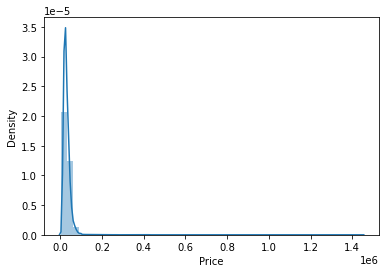

In [52]:
#Check price distribution
sns.distplot(df.Price)

In [53]:
df = df[df.Price <= (df.Price.mean() + 3 * df.Price.std())]

In [54]:
df.shape

(132109, 18)

<AxesSubplot:xlabel='Price', ylabel='Density'>

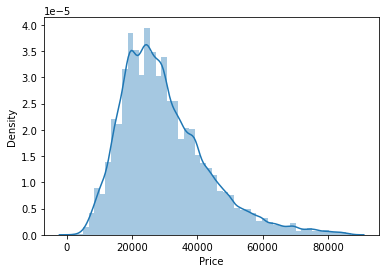

In [55]:
sns.distplot(df.Price)

In [56]:
df.describe()

,Mileage,Rating,City MPG,Highway MPG,Num_ent_features,Num_safe_features,Price,Model Year
count,132109.000000,132109.000000,132109.000000,132109.000000,132109.000000,132109.000000,132109.000000,132109.000000
mean,35648.342846,4.332357,22.533400,30.504795,1.857822,3.768199,29795.749321,2017.926228
std,32486.955760,0.676222,11.169369,20.958948,0.713981,1.364672,13315.527604,2.433730
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1500.000000,2001.000000
25%,13604.000000,4.200000,18.000000,25.000000,1.000000,3.000000,19999.000000,2017.000000
50%,28961.000000,4.500000,21.000000,28.000000,2.000000,3.000000,27389.000000,2018.000000
75%,46354.000000,4.800000,24.000000,32.000000,2.000000,5.000000,36989.000000,2020.000000
max,492592.000000,5.000000,204.000000,414.000000,4.000000,7.000000,87240.000000,2022.000000


In [57]:
df.duplicated().sum()

25419

In [58]:
df.drop_duplicates(inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106690 entries, 0 to 164783
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               106690 non-null  object 
 1   Mileage            106690 non-null  int64  
 2   Address            106690 non-null  object 
 3   Rating             106690 non-null  float64
 4   Fuel Type          106690 non-null  object 
 5   City MPG           106690 non-null  float64
 6   Highway MPG        106690 non-null  float64
 7   Drivetrain         106690 non-null  object 
 8   Engine             106690 non-null  object 
 9   Exterior Color     106690 non-null  object 
 10  Interior Color     106690 non-null  object 
 11  Transmission       106690 non-null  object 
 12  Num_ent_features   106690 non-null  float64
 13  Num_safe_features  106690 non-null  float64
 14  Price              106690 non-null  int64  
 15  Model Year         106690 non-null  int64  
 16  Ca

In [60]:
df.shape

(106690, 18)

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

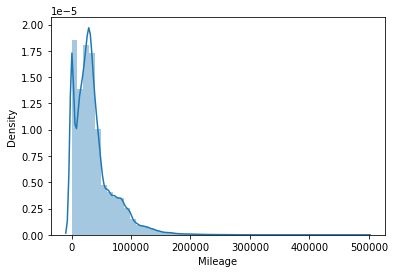

In [61]:
sns.distplot(df.Mileage)

In [62]:
df.shape

(106690, 18)

In [63]:
df = df[df.Mileage <= 200000]
df.shape

(106524, 18)

In [64]:
df.to_csv('cleaned_full_data.csv')